In [5]:
!curl -O https://raw.githubusercontent.com/CSAILVision/ADE20K/main/dataset/ADE20K_2021_17_01/images/ADE/training/urban/street/ADE_train_00016869.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1079k  100 1079k    0     0  1409k      0 --:--:-- --:--:-- --:--:-- 1409k


In [ ]:
!ls /content

ADE_train_00016869.jpg	sample_data


In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [4]:
img = cv2.imread('/content/ADE_train_00016869.jpg')
img.shape
# bgr = cv2.imread(f)
# b, g, r = cv2.split(bgr)
# rgb = cv2.merge([r, g, b]

AttributeError: ignored

In [ ]:
 cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#define the events for the
# mouse_click.
def mouse_click(event, x, y,
				flags, param):
	
	# to check if left mouse
	# button was clicked
	if event == cv2.EVENT_LBUTTONDOWN:
		
		# font for left click event
		font = cv2.FONT_HERSHEY_TRIPLEX
		LB = 'Left Button'
		
		# display that left button
		# was clicked.
		cv2.putText(img, LB, (x, y),
					font, 1,
					(255, 255, 0),
					2)
		cv2.imshow('image', img)
		
		
	# to check if right mouse
	# button was clicked
	if event == cv2.EVENT_RBUTTONDOWN:
		
		# font for right click event
		font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX
		RB = 'Right Button'
		
		# display that right button
		# was clicked.
		cv2.putText(img, RB, (x, y),
					font, 1,
					(0, 255, 255),
					2)
		cv2.imshow('image', img)

cv2.setMouseCallback('image', mouse_click)

cv2.waitKey(0)

# close all the opened windows.
cv2.destroyAllWindows()

In [ ]:
!curl -O https://raw.githubusercontent.com/CSAILVision/ADE20K/main/dataset/ADE20K_2021_17_01/images/ADE/training/urban/street/ADE_train_00016869/instance_007_ADE_train_00016869.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3779  100  3779    0     0   3790      0 --:--:-- --:--:-- --:--:--  3786


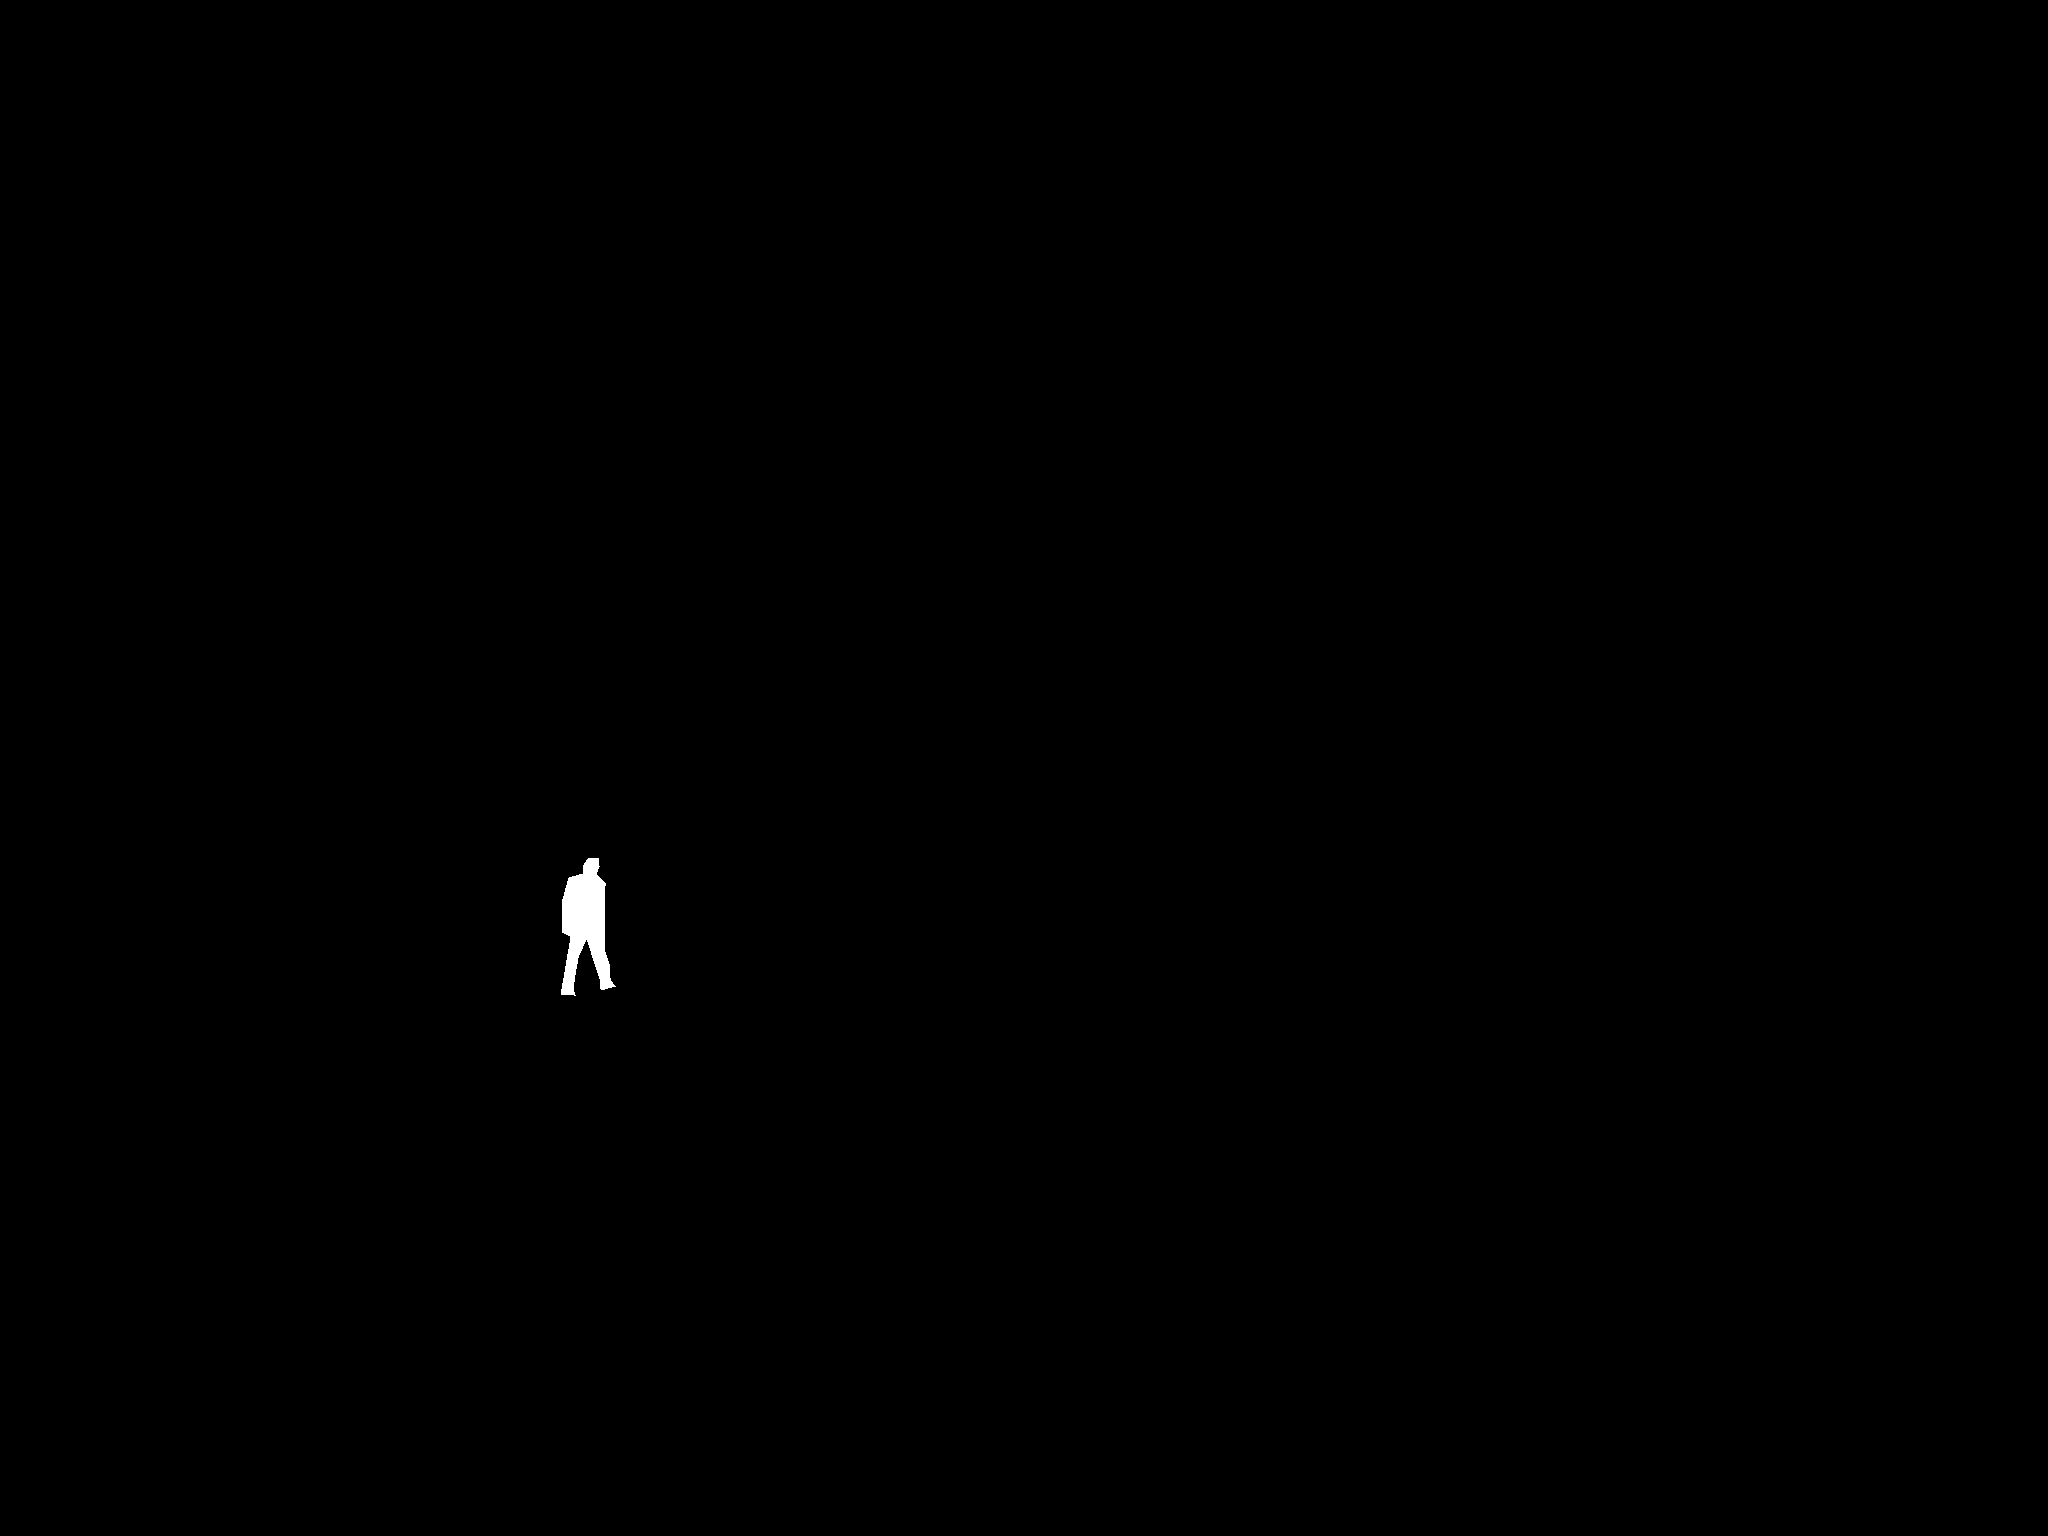

In [ ]:
img = cv2.imread('instance_007_ADE_train_00016869.png')
cv2_imshow(img)

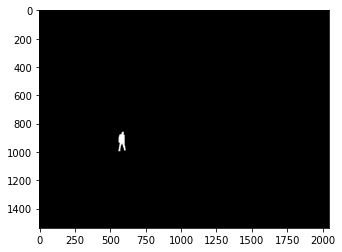

In [ ]:
plt.imshow(img)

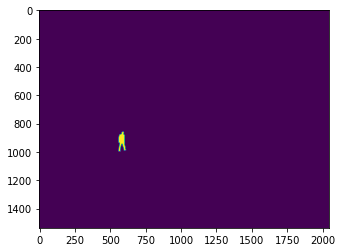

In [ ]:
img = Image.open('instance_007_ADE_train_00016869.png')
plt.imshow(img)

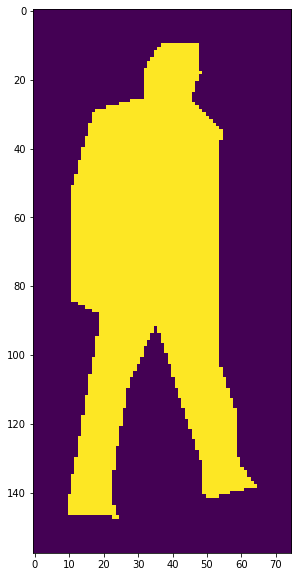

In [ ]:
padding = 10
img_np = np.array(img)[858-padding:996+padding, 561-padding:616+padding]
plt.figure(figsize=(10,10))
plt.imshow(img_np)

In [ ]:
def mask2poly(mask, distance: int = 5):
    """
    Convert segmentation mask into an xy list of polygon points [x1, y1, x2, y2, ...].

    Parameters
    ----------
    mask : np array
        Object segmentation mask of an image.

    distance : int
        Euclidean distance between polygon points. We use numpy.linalg.norm, whose
        default is L2 norm = Euclidean distance.
    
    Returns
    -------
    list
        The xy list of polygon points [x1, y1, x2, y2, ...].
    """
    # Get contours of the mask. Should return 1 object in a common use case.
    contours, hier = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Get the contours' polygons.
    poly = []
    for obj in contours:
        # Set sentinel to np.inf to always pick up the first point.
        sentinel = [np.inf, np.inf]
        for point in obj:
            # Only keep the point if it's more than the specified distance.
            if np.linalg.norm(sentinel-point[0]) >= distance:
                poly.append(int(point[0][0]))
                poly.append(int(point[0][1]))
                sentinel = point[0]

    return poly

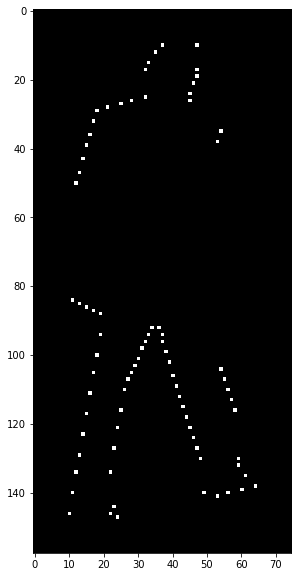

In [ ]:
z = np.zeros(img_np.shape)
im = Image.fromarray(z)
poly = mask2poly(mask=img_np, distance=2)
draw = ImageDraw.Draw(im)
draw.point(poly, fill='white')
plt.figure(figsize=(10,10))
plt.imshow(im)

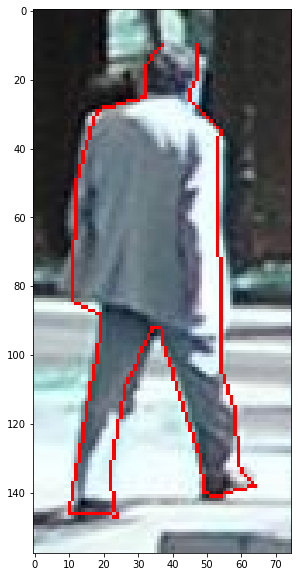

In [ ]:
img_z = cv2.imread('ADE_train_00016869.jpg')
img_z.shape
padding = 10
img_z = Image.fromarray(np.array(img_z)[858-padding:996+padding, 561-padding:616+padding])
draw = ImageDraw.Draw(img_z)
#draw.point(poly, fill='red')
draw.line(poly, fill='red')
plt.figure(figsize=(10,10))
plt.imshow(img_z)

In [7]:
def get_crop_bbox(img, bbox, padding=None):
    """
    Return the cropped portion of the given image.

    Parameters
    ----------
    img : np array

    bbox : tuple
        Base bounding box of the crop (xmin, ymin, xmax, ymax).

    padding : tuple of ints, or float
        Padding around the base bounding box.
        If None, no padding is added to the box.
        If a tuple, specify (padleft, padtop, padright, padbottom).
        If a float, a uniform but random padding around the box will be calculated.
                First, we get a base padding of: min(bboxwidth, bboxheight) * padding_pct.
                Next, we add to/subtract with: padding * random.uniform(0, padding_pct).

    Returns
    -------
    np array, tuple
        The cropped portion of the image, and its bounding box coordinates (xmin, ymin, xmax, ymax).
    """

    # Get image shape, bbox coordinates and shape.
    height, width = img.shape[:2]
    xmin, ymin, xmax, ymax = bbox
    bboxwidth, bboxheight = xmax-xmin, ymax-ymin

    # Figure out padding in number-of-pixels.
    if padding == None:
        padleft, padtop, padright, padbottom = 0, 0, 0, 0

    else:
        if type(padding) == tuple:
            # Get requested padding.
            padleft, padtop, padright, padbottom = padding

        elif type(padding) == float:
            # Get base padding.
            padding_pct = padding
            padding = int( min(bboxwidth, bboxheight) * padding_pct )

            # Make random addition/subtraction from base padding.
            padleft, padtop, padright, padbottom = padding * (1 + np.random.uniform(low=-padding_pct, high=padding_pct, size=4))

        # Figure out extra room after requested padding.
        extraleft, extraright = xmin-padleft, width-xmax-padright
        extratop, extrabottom = ymin-padtop, height-ymax-padbottom

        # Center bbox if not enough room horizontally.
        padhorz = max(0, extraleft+extraright)//2
        padleft, padright = (padhorz, padhorz) if min(extraleft, extraright) < 0 else (padleft, padright)

        # Do the same vertically.
        padvert = max(0, extratop+extrabottom)//2
        padtop, padbottom = (padvert, padvert) if min(extratop, extrabottom) < 0 else (padtop, padbottom)

    # Calculate final bbox.
    xmin, xmax = int(xmin-padleft), int(xmax+padright)
    ymin, ymax = int(ymin-padtop), int(ymax+padbottom)

    return img[ymin:ymax, xmin:xmax], (xmin, ymin, xmax, ymax)


In [10]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/fourthbrain/Week 12')

Mounted at /content/drive


In [13]:
import pandas as pd
dfd15 = pd.read_csv('ade_coco_15pts.csv')
dfd15.sample(5)

,Unnamed: 0,id,raw_name,depth_ordering_rank,crop,header_id,num_mask_points,xmin,ymin,xmax,ymax,width,height,coco_label
53670,53670,10,person,11,0,18812,23,42,142,52,178,10,36,person
24959,24959,10,person,11,1,2104,15,186,81,207,112,21,31,person
611,611,6,sofa,7,0,1829,42,370,220,575,377,205,157,couch
13947,13947,14,sofa,15,0,861,35,103,259,342,420,239,161,couch
24045,24045,14,person,15,1,18978,22,187,113,207,136,20,23,person


In [14]:
header_id = 16869
dfd15.loc[dfd15.header_id==header_id]

,Unnamed: 0,id,raw_name,depth_ordering_rank,crop,header_id,num_mask_points,xmin,ymin,xmax,ymax,width,height,coco_label
42958,42958,4,car,5,0,16869,23,1454,885,1650,971,196,86,car
42959,42959,7,person,8,0,16869,27,561,858,616,996,55,138,person
42960,42960,8,person,9,0,16869,24,807,868,843,981,36,113,person
42961,42961,16,car,17,1,16869,15,835,872,937,941,102,69,car
42962,42962,17,person,18,0,16869,28,739,875,778,982,39,107,person
42963,42963,18,person,19,0,16869,26,775,875,805,984,30,109,person
42964,42964,19,person,20,0,16869,34,416,871,467,1005,51,134,person
42965,42965,22,car,23,1,16869,15,1358,901,1498,951,140,50,car
42966,42966,24,car,25,0,16869,21,1772,896,1940,960,168,64,car
42967,42967,33,motorbike,34,0,16869,56,1024,912,1177,1012,153,100,motorcycle


In [15]:
bgr = cv2.imread('/content/ADE_train_00016869.jpg')
b, g, r = cv2.split(bgr)
img_c = cv2.merge([r, g, b])

In [16]:
dfd15.loc[(dfd15.header_id==header_id) & (dfd15.id==7)]

,Unnamed: 0,id,raw_name,depth_ordering_rank,crop,header_id,num_mask_points,xmin,ymin,xmax,ymax,width,height,coco_label
42959,42959,7,person,8,0,16869,27,561,858,616,996,55,138,person


In [34]:
def obj_shownsave(header_id, objid, padding_pct=0.25):
    _, id, raw_name, _, _, _, num_mask_points, xmin, ymin, xmax, ymax, w, h, coco_label = dfd15.loc[(dfd15.header_id==header_id) & (dfd15.id==objid)].values[0]
    bbox = (xmin, ymin, xmax, ymax)
    cropped, cbox = get_crop_bbox(img=img_c, bbox=bbox, padding=padding_pct)
    print(cbox)
    plt.axis('off')
    plt.imshow(cropped)
    plt.imsave('{}_{}.jpg'.format(header_id, objid), cropped)

(549, 847, 630, 1011)


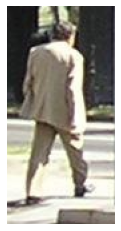

In [35]:
obj_shownsave(header_id, objid=7)

(798, 859, 853, 991)


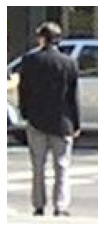

In [36]:
obj_shownsave(header_id, objid=8)